In [5]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import random
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18')
from colossus.halo import concentration, mass_defs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Volumes/Extreme_SSD/codes/master_thesis/code/configs/apjfonts}')
sz_ft = 20
sz_lb = 14
color_arr = ['indigo', 'royalblue', 'lightseagreen', 'darkgreen', 'goldenrod', 'darkred']
from tqdm import tqdm
import lensing_estimator
from cosmo import CosmoCalc
import lensing
import foregrounds as fg
import experiments as exp
import sims
import ilc
import stats
import tools

## Future Forecasts

In [8]:
nber_clus = 3000
nber_rand = 30000
nber_cov = 250
nber_clus_fit = 30000 
nber_rand_fit = 30000
map_params = [240, 0.25, 240, 0.25] 
l, cl = CosmoCalc().cmb_power_spectrum()
c500 = concentration.concentration(2e14, '500c', 0.7)
M200c, _, c200 = mass_defs.changeMassDefinition(2e14, c500, 0.7, '500c', '200c', profile='nfw')
cluster = [M200c, c200, 0.7]
centroid_shift = 0.5
c500 = concentration.concentration(2e14, '500c', 0.7)
M200c, _, c200 = mass_defs.changeMassDefinition(2e14, c500, 0.7, '500c', '200c', profile='nfw')
fname = 'data/mdpl2_cutouts_for_tszksz_clus_detection_M1.7e+14to2.3e+14_z0.6to0.8_15320haloes_boxsize20.0am.npz'
cutouts_dic = np.load(fname, allow_pickle = 1, encoding= 'latin1')['arr_0'].item()
mass_z_key = list(cutouts_dic.keys())[0]
cutouts = cutouts_dic[mass_z_key]
opbeam = 1.4
l, bl = exp.beam_power_spectrum(beam_fwhm = 1.4)
mass_int_forecasts = np.arange(0, 6, 0.2) 

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))


In [ ]:
freq_arr_so = exp.frequencies(experiment = 'so')
scale_fac_arr_so = [fg.compton_y_to_delta_Tcmb(freq = freq_arr_so[i], uK = True) for i in range(len(freq_arr_so))]
tsz_ksz_cutouts_arr_so1, tsz_ksz_cutouts_arr_so2, tsz_ksz_cutouts_arr_so3 = [], [], []
tsz_ksz_cutouts_arr_so4, tsz_ksz_cutouts_arr_so5, tsz_ksz_cutouts_arr_so6 = [], [], []
for kcntr, keyname in enumerate( cutouts ):
    tsz_cutout_so1 = cutouts[keyname]['y']*scale_fac_arr_so[0]
    tsz_cutout_so2 = cutouts[keyname]['y']*scale_fac_arr_so[1]
    tsz_cutout_so3 = cutouts[keyname]['y']*scale_fac_arr_so[2]
    tsz_cutout_so4 = cutouts[keyname]['y']*scale_fac_arr_so[3]
    tsz_cutout_so5 = cutouts[keyname]['y']*scale_fac_arr_so[4]
    tsz_cutout_so6 = cutouts[keyname]['y']*scale_fac_arr_so[5]
    ksz_cutout = cutouts[keyname]['ksz']*random.randrange(-1, 2, 2)
    tsz_ksz_cutouts_arr_so1.append(tsz_cutout_so1 + ksz_cutout) 
    tsz_ksz_cutouts_arr_so2.append(tsz_cutout_so2 + ksz_cutout) 
    tsz_ksz_cutouts_arr_so3.append(tsz_cutout_so3 + ksz_cutout) 
    tsz_ksz_cutouts_arr_so4.append(tsz_cutout_so4 + ksz_cutout) 
    tsz_ksz_cutouts_arr_so5.append(tsz_cutout_so5 + ksz_cutout) 
    tsz_ksz_cutouts_arr_so6.append(tsz_cutout_so6 + ksz_cutout) 
tsz_ksz_cutouts_arr_so = [tsz_ksz_cutouts_arr_so1, tsz_ksz_cutouts_arr_so2, tsz_ksz_cutouts_arr_so3,
                             tsz_ksz_cutouts_arr_so4, tsz_ksz_cutouts_arr_so5, tsz_ksz_cutouts_arr_so6]    
tsz_ksz_cutouts_dict_so = {}
for i, freq in enumerate(freq_arr_so):
    tsz_ksz_cutouts_dict_so[freq] = tsz_ksz_cutouts_arr_so[i]
l, cl_extragal_dic_so = fg.extragalactic_power_spectrum_dict(freq_arr_so, components = 'all')
l, bl_dic_so = exp.beam_power_spectrum_dict(experiment = 'so')
l, nl_dic_so = exp.noise_power_spectra_dict(experiment = 'so')


l, cl_residual_so, res_ilc_dic_so, weights_arr_so = hlc.residuals_and_weights(components = 'all', experiment = 'so', cov_from_sims = True)
cl_noise_so =  cl_residual_so


covariance_matrix_so, correlation_matrix_so = lensing_estimator.covariance_matrix2(nber_clus, nber_rand, nber_cov, freq_arr_so, map_params, l, cl, cluster_corr_cutouts_dict = cluster_corr_cutouts_dict_so, cl_extragal_dict = cl_extragal_dict_so, bl_dict = bl_dict_so, nl_dict = nl_dict_so, cl_noise = cl_noise_so, use_magnitude_weights = True, noise_weights = None, correct_for_tsz = True)
with open('covariance_matrix_so.npy', 'wb') as file:
    np.save(file, covariance_matrix_so)


        
dipole_profile_models_so = lensing_estimator.fit_profiles2(nber_clus_fit, nber_rand_fit, map_params, l, cl, mass_int_forecasts*1e14, c200, 0.7, bl = bl, cl_noise = cl_noise_so, use_magnitude_weights = True, use_noise_weights = False, apply_noise = True)
with open('dipole_profile_models_so.npy', 'wb') as file:
     np.save(file, dipole_profile_models_so)




lk_arr_so = []   
for i in tqdm(range(25)):   
    maps_clus_so = []
    for i in range(nber_clus):
        cmb_maps_dict_so = sims.cmb_mock_data_dict(freq_arr_so, map_params, l, cl, cluster = cluster, centroid_shift = centroid_shift, cluster_corr_cutouts_dict = tsz_ksz_cutouts_dict_so, cl_extragal_dict = cl_extragal_dic_so, bl_dict = bl_dic_so, nl_dict = nl_dic_so)
        hlc_map_so, _ = hlc.hlc_map(cmb_maps_dict_so, opbeam, map_params, components = 'all', experiment = 'so')
        maps_clus_so.append(hlc_map_so)    
    maps_rand_so = []
    for i in range(nber_rand):
        cmb_maps_dict_so = sims.cmb_mock_data_dict(freq_arr_so, map_params, l, cl, cl_extragal_dict = cl_extragal_dic_so, bl_dict = bl_dic_so, nl_dict = nl_dic_so)
        hlc_map_so, _ = hlc.hlc_map(cmb_maps_dict_so, opbeam, map_params, components = 'all', experiment = 'so')
        maps_rand_so.append(hlc_map_so)     
   
    bins_so, dipole_profile_so, stacks_so = lensing_estimator.get_dipole_profile(map_params, maps_clus_so, maps_rand_so, l, cl, cl_noise_so, use_magnitude_weights = True, noise_weights = None, correct_for_tsz = True)
    data_so = bins_so, dipole_profile_so, covariance_matrix_so
    
    likelihood_so, mean_mass_so, errors_so = stats.run_ml(data_so, dipole_profile_models_so, mass_int_foregrounds)
    mass_int_lk_so, lk_so = likelihood_so
    lk_arr_so.append(lk_so)
    

    

comb_lk_so = np.ones(len(lk_arr_so[0]))
for i in range(25):
    comb_lk_so *= lk_arr_so[i]
comb_lk_so = comb_lk_so/max(comb_lk_so)
mean_mass_comb_so, errors_comb_so = stats.ml_params(mass_int_so, comb_lk_so)      
print(mean_mass_comb_so, (errors_comb_so[0]+errors_comb_so[1])/2)   
snr_so = stats.signal_to_noise(comb_lk_so)

In [ ]:
freq_arr_ccatp = exp.frequencies(experiment = 'ccatp')
scale_fac_arr_ccatp = [fg.compton_y_to_delta_Tcmb(freq = freq_arr_ccatp[i], uK = True) for i in range(len(freq_arr_ccatp))]
tsz_ksz_cutouts_arr_ccatp1, tsz_ksz_cutouts_arr_ccatp2, tsz_ksz_cutouts_arr_ccatp3 = [], [], []
tsz_ksz_cutouts_arr_ccatp4 = []
for kcntr, keyname in enumerate( cutouts ):
    tsz_cutout_ccatp1 = cutouts[keyname]['y']*scale_fac_arr_ccatp[0]
    tsz_cutout_ccatp2 = cutouts[keyname]['y']*scale_fac_arr_ccatp[1]
    tsz_cutout_ccatp3 = cutouts[keyname]['y']*scale_fac_arr_ccatp[2]
    tsz_cutout_ccatp4 = cutouts[keyname]['y']*scale_fac_arr_ccatp[3]
    ksz_cutout = cutouts[keyname]['ksz']*random.randrange(-1, 2, 2)
    tsz_ksz_cutouts_arr_ccatp1.append(tsz_cutout_ccatp1 + ksz_cutout) 
    tsz_ksz_cutouts_arr_ccatp2.append(tsz_cutout_ccatp2 + ksz_cutout) 
    tsz_ksz_cutouts_arr_ccatp3.append(tsz_cutout_ccatp3 + ksz_cutout) 
    tsz_ksz_cutouts_arr_ccatp4.append(tsz_cutout_ccatp4 + ksz_cutout) 
tsz_ksz_cutouts_arr_ccatp = [tsz_ksz_cutouts_arr_ccatp1, tsz_ksz_cutouts_arr_ccatp2, tsz_ksz_cutouts_arr_ccatp3,
                             tsz_ksz_cutouts_arr_ccatp4]    
tsz_ksz_cutouts_dict_ccatp = {}
for i, freq in enumerate(freq_arr_ccatp):
    tsz_ksz_cutouts_dict_ccatp[freq] = tsz_ksz_cutouts_arr_ccatp[i]
l, cl_extragal_dic_ccatp = fg.extragalactic_power_spectrum_dict(freq_arr_ccatp, components = 'all')
l, bl_dic_ccatp = exp.beam_power_spectrum_dict(experiment = 'ccatp')
l, nl_dic_ccatp = exp.noise_power_spectra_dict(experiment = 'ccatp')


l, cl_residual_ccatp, res_ilc_dic_ccatp, weights_arr_ccatp = fg.residuals_and_weights(components = 'all', experiment = 'ccatp', cov_from_sims = True)
cl_noise_ccatp =  cl_residual_ccatp


covariance_matrix_ccatp, correlation_matrix_ccatp = lensing_estimator.covariance_matrix2(nber_clus, nber_rand, nber_cov, freq_arr_ccatp, map_params, l, cl, cluster_corr_cutouts_dict = cluster_corr_cutouts_dict_ccatp, cl_extragal_dict = cl_extragal_dict_ccatp, bl_dict = bl_dict_ccatp, nl_dict = nl_dict_ccatp, cl_noise = cl_noise_ccatp, use_magnitude_weights = True, noise_weights = None, correct_for_tsz = True)
with open('covariance_matrix_ccatp.npy', 'wb') as file:
    np.save(file, covariance_matrix_ccatp)


        
dipole_profile_models_ccatp = lensing_estimator.fit_profiles2(nber_clus_fit, nber_rand_fit, map_params, l, cl, mass_int_forecasts*1e14, c200, 0.7, bl = bl, cl_noise = cl_noise_ccatp, use_magnitude_weights = True, use_noise_weights = False, apply_noise = True)
with open('dipole_profile_models_ccatp.npy', 'wb') as file:
     np.save(file, dipole_profile_models_ccatp)
        

lk_arr_ccatp = []   
for i in tqdm(range(25)):   
    maps_clus_ccatp = []
    for i in range(nber_clus):
        cmb_maps_dict_ccatp = sims.cmb_mock_data_dict(freq_arr_ccatp, map_params, l, cl, cluster = cluster, centroid_shift = centroid_shift, cluster_corr_cutouts_dict = tsz_ksz_cutouts_dict_ccatp, cl_extragal_dict = cl_extragal_dic_ccatp, bl_dict = bl_dic_ccatp, nl_dict = nl_dic_ccatp)
        hlc_map_ccatp, _ = hlc.hlc_map(cmb_maps_dict_ccatp, opbeam, map_params, components = 'all', experiment = 'ccatp')
        maps_clus_so.append(hlc_map_ccatp)    
    maps_rand_ccatp = []
    for i in range(nber_rand):
        cmb_maps_dict_ccatp = sims.cmb_mock_data_dict(freq_arr_ccatp, map_params, l, cl, cl_extragal_dict = cl_extragal_dic_ccatp, bl_dict = bl_dic_ccatp, nl_dict = nl_dic_ccatp)
        hlc_map_ccatp, _ = hlc.hlc_map(cmb_maps_dict_ccatp, opbeam, map_params, components = 'all', experiment = 'ccatp')
        maps_rand_ccatp.append(hlc_map_ccatp)     
   
    bins_ccatp, dipole_profile_ccatp, stacks_ccatp = lensing_estimator.get_dipole_profile(map_params, maps_clus_ccatp, maps_rand_ccatp, l, cl, cl_noise_ccatp, use_magnitude_weights = True, noise_weights = None, correct_for_tsz = True)
    data_ccatp = bins_ccatp, dipole_profile_ccatp, covariance_matrix_ccatp
    
    likelihood_ccatp, mean_mass_ccatp, errors_ccatp = stats.run_ml(data_ccatp, dipole_profile_models_ccatp, mass_int_foregrounds)
    mass_int_lk_ccatp, lk_ccatp = likelihood_ccatp
    lk_arr_so.append(lk_ccatp)
    

    

comb_lk_ccatp = np.ones(len(lk_arr_ccatp[0]))
for i in range(25):
    comb_lk_ccatp *= lk_arr_ccatp[i]
comb_lk_ccatp = comb_lk_ccatp/max(comb_lk_ccatp)
mean_mass_comb_ccatp, errors_comb_ccatp = stats.ml_params(mass_int_ccatp, comb_lk_ccatp)      
print(mean_mass_comb_ccatp, (errors_comb_ccatp[0]+errors_comb_ccatp[1])/2)   
snr_ccatp = stats.signal_to_noise(comb_lk_ccatp)

In [ ]:
freq_arr_s4wide = exp.frequencies(experiment = 's4wide')
scale_fac_arr_s4wide = [fg.compton_y_to_delta_Tcmb(freq = freq_arr_s4wide[i], uK = True) for i in range(len(freq_arr_s4wide))]
tsz_ksz_cutouts_arr_s4wide1, tsz_ksz_cutouts_arr_s4wide2, tsz_ksz_cutouts_arr_s4wide3 = [], [], []
tsz_ksz_cutouts_arr_s4wide4, tsz_ksz_cutouts_arr_s4wide5, tsz_ksz_cutouts_arr_s4wide6 = [], [], []
for kcntr, keyname in enumerate( cutouts ):
    tsz_cutout_s4wide1 = cutouts[keyname]['y']*scale_fac_arr_s4wide[0]
    tsz_cutout_s4wide2 = cutouts[keyname]['y']*scale_fac_arr_s4wide[1]
    tsz_cutout_s4wide3 = cutouts[keyname]['y']*scale_fac_arr_s4wide[2]
    tsz_cutout_s4wide4 = cutouts[keyname]['y']*scale_fac_arr_s4wide[3]
    tsz_cutout_s4wide5 = cutouts[keyname]['y']*scale_fac_arr_s4wide[4]
    tsz_cutout_s4wide6 = cutouts[keyname]['y']*scale_fac_arr_s4wide[5]
    ksz_cutout = cutouts[keyname]['ksz']*random.randrange(-1, 2, 2)
    tsz_ksz_cutouts_arr_s4wide1.append(tsz_cutout_s4wide1 + ksz_cutout) 
    tsz_ksz_cutouts_arr_s4wide2.append(tsz_cutout_s4wide2 + ksz_cutout) 
    tsz_ksz_cutouts_arr_s4wide3.append(tsz_cutout_s4wide3 + ksz_cutout) 
    tsz_ksz_cutouts_arr_s4wide4.append(tsz_cutout_s4wide4 + ksz_cutout) 
    tsz_ksz_cutouts_arr_s4wide5.append(tsz_cutout_s4wide5 + ksz_cutout) 
    tsz_ksz_cutouts_arr_s4wide6.append(tsz_cutout_s4wide6 + ksz_cutout) 
tsz_ksz_cutouts_arr_s4wide = [tsz_ksz_cutouts_arr_s4wide1, tsz_ksz_cutouts_arr_s4wide2, tsz_ksz_cutouts_arr_s4wide3,
                             tsz_ksz_cutouts_arr_s4wide4, tsz_ksz_cutouts_arr_s4wide5, tsz_ksz_cutouts_arr_s4wide6]    
tsz_ksz_cutouts_dict_s4wide = {}
for i, freq in enumerate(freq_arr_s4wide):
    tsz_ksz_cutouts_dict_s4wide[freq] = tsz_ksz_cutouts_arr_s4wide[i]
l, cl_extragal_dic_s4wide = fg.extragalactic_power_spectrum_dict(freq_arr_s4wide, components = 'all')
l, bl_dic_s4wide = exp.beam_power_spectrum_dict(experiment = 's4wide')
l, nl_dic_s4wide = exp.noise_power_spectra_dict(experiment = 's4wide')


l, cl_residual_s4wide, res_ilc_dic_s4wide, weights_arr_s4wide = hlc.residuals_and_weights(components = 'all', experiment = 's4wide', cov_from_sims = True)
cl_noise_s4wide =  cl_residual_s4wide




covariance_matrix_s4wide, correlation_matrix_s4wide = lensing_estimator.covariance_matrix2(nber_clus, nber_rand, nber_cov, freq_arr_s4wide, map_params, l, cl, cluster_corr_cutouts_dict = cluster_corr_cutouts_dict_s4wide, cl_extragal_dict = cl_extragal_dict_s4wide, bl_dict = bl_dict_s4wide, nl_dict = nl_dict_s4wide, cl_noise = cl_noise_s4wide, use_magnitude_weights = True, noise_weights = None, correct_for_tsz = True)
with open('covariance_matrix_s4wide.npy', 'wb') as file:
    np.save(file, covariance_matrix_s4wide)


        
dipole_profile_models_s4wide = lensing_estimator.fit_profiles2(nber_clus_fit, nber_rand_fit, map_params, l, cl, mass_int_forecasts*1e14, c200, 0.7, bl = bl, cl_noise = cl_noise_s4wide, use_magnitude_weights = True, use_noise_weights = False, apply_noise = True)
with open('dipole_profile_models_s4wide.npy', 'wb') as file:
     np.save(file, dipole_profile_models_s4wide)

    

    
lk_arr_s4wide = []   
for i in tqdm(range(25)):   
    maps_clus_s4wide = []
    for i in range(nber_clus):
        cmb_maps_dict_s4wide = sims.cmb_mock_data_dict(freq_arr_s4wide, map_params, l, cl, cluster = cluster, centroid_shift = centroid_shift, cluster_corr_cutouts_dict = tsz_ksz_cutouts_dict_s4wide, cl_extragal_dict = cl_extragal_dic_s4wide, bl_dict = bl_dic_s4wide, nl_dict = nl_dic_s4wide)
        hlc_map_s4wide, _ = hlc.hlc_map(cmb_maps_dict_s4wide, opbeam, map_params, components = 'all', experiment = 's4wide')
        maps_clus_s4wide.append(hlc_map_s4wide)    
    maps_rand_s4wide = []
    for i in range(nber_rand):
        cmb_maps_dict_s4wide = sims.cmb_mock_data_dict(freq_arr_s4wide, map_params, l, cl, cl_extragal_dict = cl_extragal_dic_s4wide, bl_dict = bl_dic_s4wide, nl_dict = nl_dic_s4wide)
        hlc_map_s4wide, _ = hlc.hlc_map(cmb_maps_dict_s4wide, opbeam, map_params, components = 'all', experiment = 's4wide')
        maps_rand_s4wide.append(hlc_map_s4wide)     
   
    bins_s4wide, dipole_profile_s4wide, stacks_s4wide = lensing_estimator.get_dipole_profile(map_params, maps_clus_s4wide, maps_rand_s4wide, l, cl, cl_noise_s4wide, use_magnitude_weights = True, noise_weights = None, correct_for_tsz = True)
    data_s4wide = bins_s4wide, dipole_profile_s4wide, covariance_matrix_s4wide
    
    likelihood_s4wide, mean_mass_s4wide, errors_s4wide = stats.run_ml(data_s4wide, dipole_profile_models_s4wide, mass_int_foregrounds)
    mass_int_lk_s4wide, lk_s4wide = likelihood_s4wide
    lk_arr_s4wide.append(lk_s4wide)
    

    

comb_lk_s4wide = np.ones(len(lk_arr_s4wide[0]))
for i in range(25):
    comb_lk_s4wide *= lk_arr_s4wide[i]
comb_lk_s4wide = comb_lk_s4wide/max(comb_lk_s4wide)
mean_mass_comb_s4wide, errors_comb_s4wide = stats.ml_params(mass_int_s4wide, comb_lk_s4wide)      
print(mean_mass_comb_s4wide, (errors_comb_s4wide[0]+errors_comb_s4wide[1])/2)   
snr_s4wide = stats.signal_to_noise(comb_lk_s4wide)

In [35]:
freq_arr_s4wide = exp.frequencies(experiment = 's4wide')
scale_fac_arr_s4wide = [fg.compton_y_to_delta_Tcmb(freq = freq_arr_s4wide[i], uK = True) for i in range(len(freq_arr_s4wide))]
tsz_ksz_cutouts_arr_s4wide1, tsz_ksz_cutouts_arr_s4wide2, tsz_ksz_cutouts_arr_s4wide3 = [], [], []
tsz_ksz_cutouts_arr_s4wide4, tsz_ksz_cutouts_arr_s4wide5, tsz_ksz_cutouts_arr_s4wide6 = [], [], []
for kcntr, keyname in enumerate( cutouts ):
    tsz_cutout_s4wide1 = cutouts[keyname]['y']*scale_fac_arr_s4wide[0]
    tsz_cutout_s4wide2 = cutouts[keyname]['y']*scale_fac_arr_s4wide[1]
    tsz_cutout_s4wide3 = cutouts[keyname]['y']*scale_fac_arr_s4wide[2]
    tsz_cutout_s4wide4 = cutouts[keyname]['y']*scale_fac_arr_s4wide[3]
    tsz_cutout_s4wide5 = cutouts[keyname]['y']*scale_fac_arr_s4wide[4]
    tsz_cutout_s4wide6 = cutouts[keyname]['y']*scale_fac_arr_s4wide[5]
    ksz_cutout = cutouts[keyname]['ksz']*random.randrange(-1, 2, 2)
    tsz_ksz_cutouts_arr_s4wide1.append(tsz_cutout_s4wide1 + ksz_cutout) 
    tsz_ksz_cutouts_arr_s4wide2.append(tsz_cutout_s4wide2 + ksz_cutout) 
    tsz_ksz_cutouts_arr_s4wide3.append(tsz_cutout_s4wide3 + ksz_cutout) 
    tsz_ksz_cutouts_arr_s4wide4.append(tsz_cutout_s4wide4 + ksz_cutout) 
    tsz_ksz_cutouts_arr_s4wide5.append(tsz_cutout_s4wide5 + ksz_cutout) 
    tsz_ksz_cutouts_arr_s4wide6.append(tsz_cutout_s4wide6 + ksz_cutout) 
tsz_ksz_cutouts_arr_s4wide = [tsz_ksz_cutouts_arr_s4wide1, tsz_ksz_cutouts_arr_s4wide2, tsz_ksz_cutouts_arr_s4wide3,
                             tsz_ksz_cutouts_arr_s4wide4, tsz_ksz_cutouts_arr_s4wide5, tsz_ksz_cutouts_arr_s4wide6]    
tsz_ksz_cutouts_dic_s4wide = {}
for i, freq in enumerate(freq_arr_s4wide):
    tsz_ksz_cutouts_dic_s4wide[freq] = tsz_ksz_cutouts_arr_s4wide[i]
l, cl_extragal_dic_s4wide = fg.extragalactic_power_spectrum_dic(freq_arr_s4wide, components = 'all')
l, bl_dic_s4wide = exp.beam_power_spectrum_dic(experiment = 's4wide')
l, nl_dic_s4wide = exp.noise_power_spectra_dic(experiment = 's4wide')


l, cl_residual_s4wide, res_ilc_dic_s4wide, weights_arr_s4wide = ilc.residuals_and_weights(components = 'all', experiment = 's4wide', cov_from_sims = True)
cl_noise_s4wide =  cl_residual_s4wide
cmb_maps_dic_s4wide = sims.cmb_mock_data_dic(freq_arr_s4wide, map_params, l, cl, cluster = cluster, cluster_corr_cutouts_dic = tsz_ksz_cutouts_dic_s4wide, cl_extragal_dic = cl_extragal_dic_s4wide, bl_dic = bl_dic_s4wide, nl_dic = nl_dic_s4wide)
ilc_map_s4wide, _ = ilc.ilc_map(cmb_maps_dic_s4wide, opbeam, map_params, components = 'all', experiment = 's4wide')


print('done')
freq_arr_so = exp.frequencies(experiment = 'so')
scale_fac_arr_so = [fg.compton_y_to_delta_Tcmb(freq = freq_arr_so[i], uK = True) for i in range(len(freq_arr_so))]
tsz_ksz_cutouts_arr_so1, tsz_ksz_cutouts_arr_so2, tsz_ksz_cutouts_arr_so3 = [], [], []
tsz_ksz_cutouts_arr_so4, tsz_ksz_cutouts_arr_so5, tsz_ksz_cutouts_arr_so6 = [], [], []

for kcntr, keyname in enumerate( cutouts ):
    tsz_cutout_so1 = cutouts[keyname]['y']*scale_fac_arr_so[0]
    tsz_cutout_so2 = cutouts[keyname]['y']*scale_fac_arr_so[1]
    tsz_cutout_so3 = cutouts[keyname]['y']*scale_fac_arr_so[2]
    tsz_cutout_so4 = cutouts[keyname]['y']*scale_fac_arr_so[3]
    tsz_cutout_so5 = cutouts[keyname]['y']*scale_fac_arr_so[4]
    tsz_cutout_so6 = cutouts[keyname]['y']*scale_fac_arr_so[5]
    ksz_cutout = cutouts[keyname]['ksz']*random.randrange(-1, 2, 2)
    tsz_ksz_cutouts_arr_so1.append(tsz_cutout_so1 + ksz_cutout) 
    tsz_ksz_cutouts_arr_so2.append(tsz_cutout_so2 + ksz_cutout) 
    tsz_ksz_cutouts_arr_so3.append(tsz_cutout_so3 + ksz_cutout) 
    tsz_ksz_cutouts_arr_so4.append(tsz_cutout_so4 + ksz_cutout) 
    tsz_ksz_cutouts_arr_so5.append(tsz_cutout_so5 + ksz_cutout) 
    tsz_ksz_cutouts_arr_so6.append(tsz_cutout_so6 + ksz_cutout) 
tsz_ksz_cutouts_arr_so = [tsz_ksz_cutouts_arr_so1, tsz_ksz_cutouts_arr_so2, tsz_ksz_cutouts_arr_so3,
                             tsz_ksz_cutouts_arr_so4, tsz_ksz_cutouts_arr_so5, tsz_ksz_cutouts_arr_so6]    
tsz_ksz_cutouts_dic_so = {}
for i, freq in enumerate(freq_arr_so):
    tsz_ksz_cutouts_dic_so[freq] = tsz_ksz_cutouts_arr_so[i]
l, cl_extragal_dic_so = fg.extragalactic_power_spectrum_dic(freq_arr_so, components = 'all')
l, bl_dic_so = exp.beam_power_spectrum_dic(experiment = 'so')
l, nl_dic_so = exp.noise_power_spectra_dic(experiment = 'so')


l, cl_residual_so, res_ilc_dic_so, weights_arr_so = ilc.residuals_and_weights(components = 'all', experiment = 'so', cov_from_sims = True)
cl_noise_so =  cl_residual_so
cmb_maps_dic_so = sims.cmb_mock_data_dic(freq_arr_so, map_params, l, cl, cluster = cluster, cluster_corr_cutouts_dic = tsz_ksz_cutouts_dic_so, cl_extragal_dic = cl_extragal_dic_so, bl_dic = bl_dic_so, nl_dic = nl_dic_so)
ilc_map_so, _ = ilc.ilc_map(cmb_maps_dic_so, opbeam, map_params, components = 'all', experiment = 'so')

    
print('done') 
    
freq_arr_ccatp = exp.frequencies(experiment = 'ccatp')
scale_fac_arr_ccatp = [fg.compton_y_to_delta_Tcmb(freq = freq_arr_ccatp[i], uK = True) for i in range(len(freq_arr_ccatp))]
tsz_ksz_cutouts_arr_ccatp1, tsz_ksz_cutouts_arr_ccatp2, tsz_ksz_cutouts_arr_ccatp3 = [], [], []
tsz_ksz_cutouts_arr_ccatp4, tsz_ksz_cutouts_arr_ccatp5, tsz_ksz_cutouts_arr_ccatp6 = [], [], []
tsz_ksz_cutouts_arr_ccatp7, tsz_ksz_cutouts_arr_ccatp8, tsz_ksz_cutouts_arr_ccatp9 = [], [], []
tsz_ksz_cutouts_arr_ccatp10 = []
for kcntr, keyname in enumerate( cutouts ):
    tsz_cutout_ccatp1 = cutouts[keyname]['y']*scale_fac_arr_ccatp[0]
    tsz_cutout_ccatp2 = cutouts[keyname]['y']*scale_fac_arr_ccatp[1]
    tsz_cutout_ccatp3 = cutouts[keyname]['y']*scale_fac_arr_ccatp[2]
    tsz_cutout_ccatp4 = cutouts[keyname]['y']*scale_fac_arr_ccatp[3]
    tsz_cutout_ccatp5 = cutouts[keyname]['y']*scale_fac_arr_ccatp[4]
    tsz_cutout_ccatp6 = cutouts[keyname]['y']*scale_fac_arr_ccatp[5]
    tsz_cutout_ccatp7 = cutouts[keyname]['y']*scale_fac_arr_ccatp[6]
    tsz_cutout_ccatp8 = cutouts[keyname]['y']*scale_fac_arr_ccatp[7]
    tsz_cutout_ccatp9 = cutouts[keyname]['y']*scale_fac_arr_ccatp[8]
    tsz_cutout_ccatp10 = cutouts[keyname]['y']*scale_fac_arr_ccatp[9]
    ksz_cutout = cutouts[keyname]['ksz']*random.randrange(-1, 2, 2)
    tsz_ksz_cutouts_arr_ccatp1.append(tsz_cutout_ccatp1 + ksz_cutout) 
    tsz_ksz_cutouts_arr_ccatp2.append(tsz_cutout_ccatp2 + ksz_cutout) 
    tsz_ksz_cutouts_arr_ccatp3.append(tsz_cutout_ccatp3 + ksz_cutout) 
    tsz_ksz_cutouts_arr_ccatp4.append(tsz_cutout_ccatp4 + ksz_cutout) 
    tsz_ksz_cutouts_arr_ccatp5.append(tsz_cutout_ccatp5 + ksz_cutout) 
    tsz_ksz_cutouts_arr_ccatp6.append(tsz_cutout_ccatp6 + ksz_cutout) 
    tsz_ksz_cutouts_arr_ccatp7.append(tsz_cutout_ccatp7 + ksz_cutout) 
    tsz_ksz_cutouts_arr_ccatp8.append(tsz_cutout_ccatp8 + ksz_cutout)
    tsz_ksz_cutouts_arr_ccatp9.append(tsz_cutout_ccatp9 + ksz_cutout) 
    tsz_ksz_cutouts_arr_ccatp10.append(tsz_cutout_ccatp10 + ksz_cutout) 
tsz_ksz_cutouts_arr_ccatp = [tsz_ksz_cutouts_arr_ccatp1, tsz_ksz_cutouts_arr_ccatp2, tsz_ksz_cutouts_arr_ccatp3,
                             tsz_ksz_cutouts_arr_ccatp4, tsz_ksz_cutouts_arr_ccatp5, tsz_ksz_cutouts_arr_ccatp6, 
                             tsz_ksz_cutouts_arr_ccatp7, tsz_ksz_cutouts_arr_ccatp8, tsz_ksz_cutouts_arr_ccatp9,
                             tsz_ksz_cutouts_arr_ccatp10]    
tsz_ksz_cutouts_dic_ccatp = {}
for i, freq in enumerate(freq_arr_ccatp):
    tsz_ksz_cutouts_dic_ccatp[freq] = tsz_ksz_cutouts_arr_ccatp[i]
l, cl_extragal_dic_ccatp = fg.extragalactic_power_spectrum_dic(freq_arr_ccatp, components = 'all')
l, bl_dic_ccatp = exp.beam_power_spectrum_dic(experiment = 'ccatp')
l, nl_dic_ccatp = exp.noise_power_spectra_dic(experiment = 'ccatp')


l, cl_residual_ccatp, res_ilc_dic_ccatp, weights_arr_ccatp = ilc.residuals_and_weights(components = 'all', experiment = 'ccatp', cov_from_sims = True)
cl_noise_ccatp =  cl_residual_ccatp
cmb_maps_dic_ccatp = sims.cmb_mock_data_dic(freq_arr_ccatp, map_params, l, cl, cluster = cluster, cluster_corr_cutouts_dic = tsz_ksz_cutouts_dic_ccatp, cl_extragal_dic = cl_extragal_dic_ccatp, bl_dic = bl_dic_ccatp, nl_dic = nl_dic_ccatp)
ilc_map_ccatp, _ = ilc.ilc_map(cmb_maps_dic_ccatp, opbeam, map_params, components = 'all', experiment = 'ccatp')

/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: divide by zero encountered in true_divide
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: invalid value encountered in multiply
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: divide by zero encountered in true_divide
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: invalid value encountered in multiply
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:129: RuntimeWarning: divide by zero encountered in true_divide
  cl_tsz =  (2*np.pi)/(l * (l+1)) * dl_tsz
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:129: RuntimeWarning: invalid value encountered in multiply
  cl_tsz =  (2*np.pi)/(l * (l+1)) * dl_tsz
/Volumes/Extreme_SSD/c

done
done


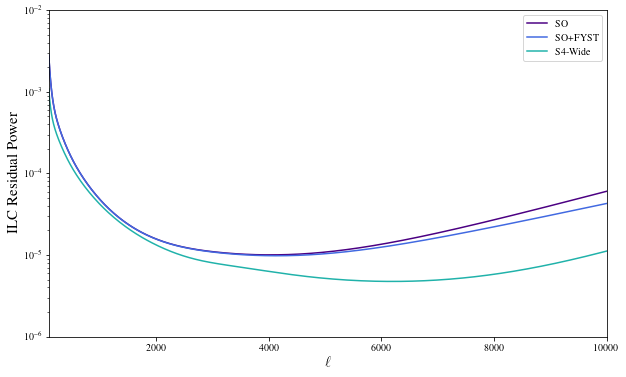

In [81]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_yscale('log')
ax.plot(l, cl_residual_so-res_ilc_dic_so['ksz'], label = 'SO', color = color_arr[0])
ax.plot(l, cl_residual_ccatp-res_ilc_dic_ccatp['ksz'], label = 'SO+FYST', color = color_arr[1])
ax.plot(l, cl_residual_s4wide-res_ilc_dic_s4wide['ksz'], label = 'S4-Wide', color = color_arr[2])
ax.set_ylabel('ILC Residual Power', fontsize = 15)
ax.set_xlabel(r'$\ell$', fontsize = 15)
ax.set_xlim(100, 10000)
ax.set_ylim(1e-6, 1e-2)
ax.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

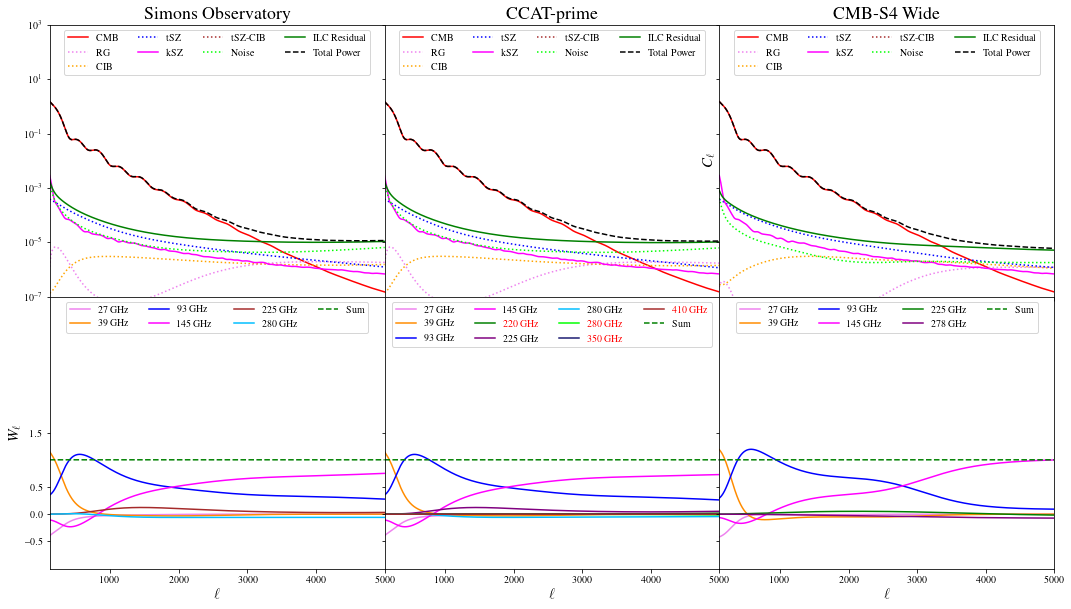

In [72]:
fig, axs = plt.subplots(2, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(18,10))
(ax1, ax2, ax3), (ax4, ax5, ax6) = axs


ax1.set_yscale('log')
ax1.plot(l, cl, label = 'CMB', color = 'red')
ax1.set_title('Simons Observatory', fontsize = 18)
ax1.plot(l, res_ilc_dic_so['radio'], label = 'RG', color = 'violet', ls = ':')
ax1.plot(l, res_ilc_dic_so['cib'], label = 'CIB', color = 'orange', ls = ':')
ax1.plot(l, res_ilc_dic_so['tsz'], label = 'tSZ', color = 'blue', ls = ':')
ax1.plot(l, res_ilc_dic_so['ksz'], label = 'kSZ', color = 'magenta')
ax1.plot(l, res_ilc_dic_so['tsz_cib'], label = 'tSZ-CIB', color = 'brown', ls = ':')
ax1.plot(l, res_ilc_dic_so['noise'], label = 'Noise', color = 'lime', ls = ':')
ax1.plot(l, cl_residual_so-res_ilc_dic_so['ksz'], label = 'ILC Residual', color = 'green')
ax1.plot(l, cl + cl_residual_so, label = 'Total Power', color = 'black', ls = '--')
ax1.legend(ncol=4, loc = 'upper center')




ax2.plot(l, cl, label = 'CMB', color = 'red')
ax2.set_title('CCAT-prime', fontsize = 18)
ax2.plot(l, res_ilc_dic_ccatp['radio'], label = 'RG', color = 'violet', ls = ':')
ax2.plot(l, res_ilc_dic_ccatp['cib'], label = 'CIB', color = 'orange', ls = ':')
ax2.plot(l, res_ilc_dic_ccatp['tsz'], label = 'tSZ', color = 'blue', ls = ':')
ax2.plot(l, res_ilc_dic_ccatp['ksz'], label = 'kSZ', color = 'magenta')
ax2.plot(l, res_ilc_dic_ccatp['tsz_cib'], label = 'tSZ-CIB', color = 'brown', ls = ':')
ax2.plot(l, res_ilc_dic_ccatp['noise'], label = 'Noise', color = 'lime', ls = ':')
ax2.plot(l, cl_residual_ccatp-res_ilc_dic_ccatp['ksz'], label = 'ILC Residual', color = 'green')
ax2.plot(l, cl + cl_residual_ccatp, label = 'Total Power', color = 'black', ls = '--')
ax2.legend(ncol=4, loc = 'upper center')


ax3.plot(l, cl, label = 'CMB', color = 'red')
ax3.set_title('CMB-S4 Wide', fontsize = 18)
ax3.plot(l, res_ilc_dic_s4wide['radio'], label = 'RG', color = 'violet', ls = ':')
ax3.plot(l, res_ilc_dic_s4wide['cib'], label = 'CIB', color = 'orange', ls = ':')
ax3.plot(l, res_ilc_dic_s4wide['tsz'], label = 'tSZ', color = 'blue', ls = ':')
ax3.plot(l, res_ilc_dic_s4wide['ksz'], label = 'kSZ', color = 'magenta')
ax3.plot(l, res_ilc_dic_s4wide['tsz_cib'], label = 'tSZ-CIB', color = 'brown', ls = ':')
ax3.plot(l, res_ilc_dic_s4wide['noise'], label = 'Noise', color = 'lime', ls = ':')
ax3.plot(l, cl_residual_s4wide-res_ilc_dic_s4wide['ksz'], label = 'ILC Residual', color = 'green')
ax3.plot(l, cl + cl_residual_s4wide, label = 'Total Power', color = 'black', ls = '--')
ax3.set_ylabel(r'$C_{\ell}$', fontsize = 15)
ax3.set_ylim(1e-7,1e3)
ax3.legend(ncol=4, loc = 'upper center')



ax4.plot(l, weights_arr_so[0], label = str(freq_arr_so[0])+' GHz', color = 'violet')
ax4.plot(l, weights_arr_so[1], label = str(freq_arr_so[1])+' GHz', color = 'darkorange')
ax4.plot(l, weights_arr_so[2], label = str(freq_arr_so[2])+' GHz', color = 'blue')
ax4.plot(l, weights_arr_so[3], label = str(freq_arr_so[3])+' GHz', color = 'magenta')
ax4.plot(l, weights_arr_so[4], label = str(freq_arr_so[4])+' GHz', color = 'brown')
ax4.plot(l, weights_arr_so[5], label = str(freq_arr_so[5])+' GHz', color = 'deepskyblue')
tot = np.asarray(weights_arr_so[0])+np.asarray(weights_arr_so[1])+np.asarray(weights_arr_so[2])+np.asarray(weights_arr_so[3])+np.asarray(weights_arr_so[4])+np.asarray(weights_arr_so[5])
ax4.plot(l, tot, label = 'Sum', color = 'green', ls = '--')
ax4.set_xlim(115, 5000)
ax4.set_ylim(-1., 4.)
ax4.set_xlabel(r'$\ell$', fontsize = 15)
ax4.set_ylabel(r'$W_{\ell}$', fontsize = 15) 
ax4.set_yticks([-0.5, 0, 0.5, 1.5])
ax4.legend(ncol=4, loc = 'upper center')


ax5.plot(l, weights_arr_ccatp[0], label = str(int(round(freq_arr_ccatp[0],0)))+' GHz', color = 'violet')
ax5.plot(l, weights_arr_ccatp[1], label = str(int(round(freq_arr_ccatp[1],0)))+' GHz', color = 'darkorange')
ax5.plot(l, weights_arr_ccatp[2], label = str(int(round(freq_arr_ccatp[2],0)))+' GHz', color = 'blue')
ax5.plot(l, weights_arr_ccatp[3], label = str(int(round(freq_arr_ccatp[3],0)))+' GHz', color = 'magenta')
ax5.plot(l, weights_arr_ccatp[4], label = str(int(round(freq_arr_ccatp[4],0)))+' GHz', color = 'green')
ax5.plot(l, weights_arr_ccatp[5], label = str(int(round(freq_arr_ccatp[5],0)))+' GHz', color = 'purple')
ax5.plot(l, weights_arr_ccatp[6], label = str(int(round(freq_arr_ccatp[6],0)))+' GHz', color = 'deepskyblue')
ax5.plot(l, weights_arr_ccatp[7], label = str(int(round(freq_arr_ccatp[7],0)))+' GHz', color = 'lime')
ax5.plot(l, weights_arr_ccatp[8], label = str(int(round(freq_arr_ccatp[8],0)))+' GHz', color = 'midnightblue')
ax5.plot(l, weights_arr_ccatp[9], label = str(int(round(freq_arr_ccatp[9],0)))+' GHz', color = 'brown')
tot = np.asarray(weights_arr_ccatp[0])+np.asarray(weights_arr_ccatp[1])+np.asarray(weights_arr_ccatp[2])+np.asarray(weights_arr_ccatp[3])+np.asarray(weights_arr_ccatp[4])+np.asarray(weights_arr_ccatp[5])+np.asarray(weights_arr_ccatp[6])+np.asarray(weights_arr_ccatp[7])+np.asarray(weights_arr_ccatp[8])+np.asarray(weights_arr_ccatp[9])                                                                                                                                        
ax5.plot(l, tot, label = 'Sum', color = 'green', ls = '--')
ax5.set_xlim(115, 5000)
ax5.legend(ncol=4, loc = 'upper center')
ax5.set_xlabel(r'$\ell$', fontsize = 15)
leg = ax5.legend(ncol=4, loc = 'upper center')
txts = []
for text in leg.get_texts():
    txts.append(text)
tx = []
tx.append(txts[4])
tx.append(txts[7])
tx.append(txts[8])
tx.append(txts[9])
for j in tx:
    plt.setp(j, color = 'red')

ax6.plot(l, weights_arr_s4wide[0], label = str(freq_arr_s4wide[0])+' GHz', color = 'violet')
ax6.plot(l, weights_arr_s4wide[1], label = str(freq_arr_s4wide[1])+' GHz', color = 'darkorange')
ax6.plot(l, weights_arr_s4wide[2], label = str(freq_arr_s4wide[2])+' GHz', color = 'blue')
ax6.plot(l, weights_arr_s4wide[3], label = str(freq_arr_s4wide[3])+' GHz', color = 'magenta')
ax6.plot(l, weights_arr_s4wide[4], label = str(freq_arr_s4wide[4])+' GHz', color = 'green')
ax6.plot(l, weights_arr_s4wide[5], label = str(freq_arr_s4wide[5])+' GHz', color = 'purple')
tot = np.asarray(weights_arr_s4wide[0])+np.asarray(weights_arr_s4wide[1])+np.asarray(weights_arr_s4wide[2])+np.asarray(weights_arr_s4wide[3])+np.asarray(weights_arr_s4wide[4])+np.asarray(weights_arr_s4wide[5])                                                                                                                                        
ax6.plot(l, tot, label = 'Sum', color = 'green', ls = '--')
ax6.set_xlim(115, 5000)
ax6.set_xlabel(r'$\ell$', fontsize = 15)
ax6.legend(ncol=4, loc = 'upper center')



plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/residuals_and_weights.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)

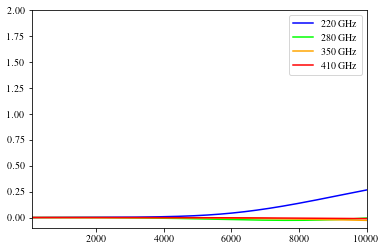

In [69]:
plt.xlim(100, 10000)
plt.ylim(-0.1,2)
#plt.plot(l, weights_arr_ccatp[0], label = str(int(round(freq_arr_ccatp[0],0)))+' GHz', color = 'violet')
#plt.plot(l, weights_arr_ccatp[1], label = str(int(round(freq_arr_ccatp[1],0)))+' GHz', color = 'darkorange')
#plt.plot(l, weights_arr_ccatp[2], label = str(int(round(freq_arr_ccatp[2],0)))+' GHz', color = 'blue')
#plt.plot(l, weights_arr_ccatp[3], label = str(int(round(freq_arr_ccatp[3],0)))+' GHz', color = 'magenta')
plt.plot(l, weights_arr_ccatp[4], label = str(int(round(freq_arr_ccatp[4],0)))+' GHz', color = 'blue')
#plt.plot(l, weights_arr_ccatp[5], label = str(int(round(freq_arr_ccatp[5],0)))+' GHz', color = 'purple')
#plt.plot(l, weights_arr_ccatp[6], label = str(int(round(freq_arr_ccatp[6],0)))+' GHz', color = 'deepskyblue')
plt.plot(l, weights_arr_ccatp[7], label = str(int(round(freq_arr_ccatp[7],0)))+' GHz', color = 'lime')
plt.plot(l, weights_arr_ccatp[8], label = str(int(round(freq_arr_ccatp[8],0)))+' GHz', color = 'orange')
plt.plot(l, weights_arr_ccatp[9], label = str(int(round(freq_arr_ccatp[9],0)))+' GHz', color = 'red')
plt.legend()
#tot = np.asarray(weights_arr_ccatp[0])+np.asarray(weights_arr_ccatp[1])+np.asarray(weights_arr_ccatp[2])+np.asarray(weights_arr_ccatp[3])+np.asarray(weights_arr_ccatp[4])+np.asarray(weights_arr_ccatp[5])+np.asarray(weights_arr_ccatp[6])+np.asarray(weights_arr_ccatp[7])+np.asarray(weights_arr_ccatp[8])+np.asarray(weights_arr_ccatp[9])                                                                                                                                        
#ax5.plot(l, tot, label = 'Sum', color = 'green', ls = '--')
#txts = []
#for text in leg.get_texts():
#    txts.append(text)
#tx = []
#tx.append(txts[4])
#tx.append(txts[7])
#tx.append(txts[8])
#tx.append(txts[9])
#for j in tx:
#    plt.setp(j, color = 'red')

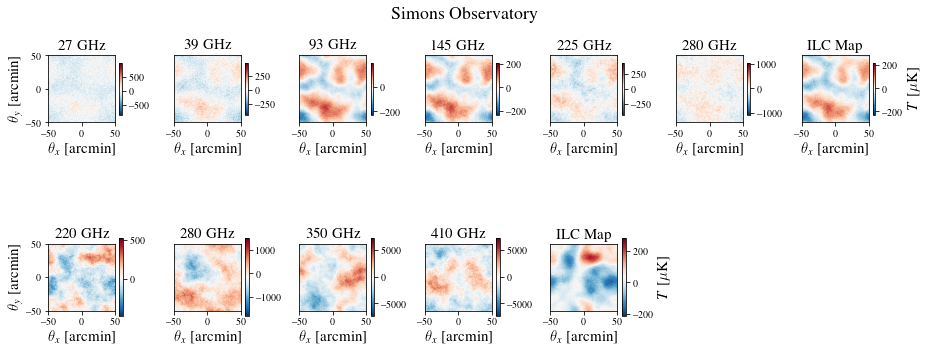

In [37]:
map_arr_so = []
for freq in freq_arr_so:
    curr_map = cmb_maps_dic_so[freq]
    map_arr_so.append(curr_map)    

map_arr_ccatp = []
for freq in freq_arr_ccatp:
    curr_map = cmb_maps_dic_ccatp[freq]
    map_arr_ccatp.append(curr_map)  
    
_, extent = tools.make_grid([400, 0.25, 400, 0.25])
fig, axs = plt.subplots(2,7, figsize=(15,15))



img00 = axs[0,0].imshow(map_arr_so[0], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img00, ax = axs[0,0], shrink = 0.082)
axs[0,0].set_title(str(freq_arr_s4wide[0])+' GHz', fontsize = '15')
axs[0,0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = '15')
axs[0,0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
img01 = axs[0,1].imshow(map_arr_so[1], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img01, ax = axs[0,1], shrink = 0.082)
axs[0,1].set_title(str(freq_arr_so[1])+' GHz', fontsize = '15')
axs[0,1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[0,1].get_yaxis().set_visible(False)
img02 = axs[0,2].imshow(map_arr_so[2], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img02, ax = axs[0,2], shrink = 0.082)
axs[0,2].set_title(str(freq_arr_so[2])+' GHz', fontsize = '15')
axs[0,2].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[0,2].get_yaxis().set_visible(False)
img03 = axs[0,3].imshow(map_arr_so[3], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img03, ax = axs[0,3], shrink = 0.082)
axs[0,3].set_title(str(freq_arr_so[3])+' GHz', fontsize = '15')
axs[0,3].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[0,3].get_yaxis().set_visible(False)
img04 = axs[0,4].imshow(map_arr_so[4], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img04, ax = axs[0,4], shrink = 0.082)
axs[0,4].set_title(str(freq_arr_so[4])+' GHz', fontsize = '15')
axs[0,4].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[0,4].get_yaxis().set_visible(False)
img05 = axs[0,5].imshow(map_arr_so[5], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img05, ax = axs[0,5], shrink = 0.082)
axs[0,5].set_title(str(freq_arr_so[5])+' GHz', fontsize = '15')
axs[0,5].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[0,5].get_yaxis().set_visible(False)
img06 = axs[0,6].imshow(ilc_map_so, extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img06, ax = axs[0,6], shrink = 0.082).set_label(label=r'$T \ [\mu$'+'K]', size=15)
axs[0,6].set_title('ILC Map', fontsize = '15')
axs[0,6].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[0,6].get_yaxis().set_visible(False)


img10 = axs[1, 0].imshow(map_arr_ccatp[4], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img10, ax = axs[1,0], shrink = 0.125)
axs[1,0].set_title(str(freq_arr_ccatp[4])+' GHz', fontsize = '15')
axs[1,0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = '15')
axs[1,0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
img11 = axs[1, 1].imshow(map_arr_ccatp[7], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img11, ax = axs[1,1], shrink = 0.125)
axs[1,1].set_title(str(int(round(freq_arr_ccatp[7], 0)))+' GHz', fontsize = '15')
axs[1,1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[1,1].get_yaxis().set_visible(False)
img12 = axs[1, 2].imshow(map_arr_ccatp[8], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img12, ax = axs[1,2], shrink = 0.125)
axs[1,2].set_title(str(freq_arr_ccatp[8])+' GHz', fontsize = '15')
axs[1,2].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[1,2].get_yaxis().set_visible(False)
img13 = axs[1, 3].imshow(map_arr_ccatp[9], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img12, ax = axs[1,3], shrink = 0.125)
axs[1,3].set_title(str(freq_arr_ccatp[9])+' GHz', fontsize = '15')
axs[1,3].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[1,3].get_yaxis().set_visible(False)
img14 = axs[1, 4].imshow(ilc_map_ccatp, extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img14, ax = axs[1,4], shrink = 0.125).set_label(label=r'$T \ [\mu$'+'K]', size=15)
axs[1,4].set_title('ILC Map', fontsize = '15')
axs[1,4].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[1,4].get_yaxis().set_visible(False)
axs[1,5].set_visible(False)
axs[1,6].set_visible(False)

fig.subplots_adjust(wspace=0.5, hspace = -0.7)
axs[0,3].text(-100, 105, 'Simons Observatory', fontsize = 18)
plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/multifrequency_maps_so+ccatp.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
map_arr_s4wide = []
for freq in freq_arr_s4wide:
    curr_map = cmb_maps_dic_s4wide[freq]
    map_arr_s4wide.append(curr_map)
    
_, extent = tools.make_grid([400, 0.25, 400, 0.25])
fig, axs = plt.subplots(1,7, figsize=(15, 15))



img00 = axs[0].imshow(map_arr_s4wide[0], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img00, ax = axs[0], shrink = 0.082)
axs[0].set_title(str(freq_arr_s4wide[0])+' GHz', fontsize = '15')
axs[0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = '15')
axs[0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
img01 = axs[1].imshow(map_arr_s4wide[1], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img01, ax = axs[1], shrink = 0.082)
axs[1].set_title(str(freq_arr_s4wide[1])+' GHz', fontsize = '15')
axs[1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[1].get_yaxis().set_visible(False)
img02 = axs[2].imshow(map_arr_s4wide[2], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img02, ax = axs[2], shrink = 0.082)
axs[2].set_title(str(freq_arr_s4wide[2])+' GHz', fontsize = '15')
axs[2].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[2].get_yaxis().set_visible(False)
img03 = axs[3].imshow(map_arr_s4wide[3], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img03, ax = axs[3], shrink = 0.082)
axs[3].set_title(str(freq_arr_s4wide[3])+' GHz', fontsize = '15')
axs[3].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[3].get_yaxis().set_visible(False)
img04 = axs[4].imshow(map_arr_s4wide[4], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img04, ax = axs[4], shrink = 0.082)
axs[4].set_title(str(freq_arr_s4wide[4])+' GHz', fontsize = '15')
axs[4].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[4].get_yaxis().set_visible(False)
img05 = axs[5].imshow(map_arr_s4wide[5], extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img05, ax = axs[5], shrink = 0.082)
axs[5].set_title(str(freq_arr_s4wide[5])+' GHz', fontsize = '15')
axs[5].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[5].get_yaxis().set_visible(False)
img06 = axs[6].imshow(ilc_map_s4wide, extent = extent, cmap = cm.RdBu_r)
fig.colorbar(img06, ax = axs[6], shrink = 0.082).set_label(label=r'$T \ [\mu$'+'K]', size=15)
axs[6].set_title('ILC Map', fontsize = '15')
axs[6].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = '15')
axs[6].get_yaxis().set_visible(False)


fig.subplots_adjust(wspace=0.5)
axs[3].text(-70, 105, 'CMB-S4 Wide', fontsize = 18)
plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/multifrequency_maps_cmb_s4.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
experiments = ['S4-Wide', 'SO', 'CCAT-p']
snr_arr = [5,5,4]
plt.plot(experiments, snr_arr, ls = '', marker = 'o')
plt.savefig('forecasts.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)

In [83]:
c500 = concentration.concentration(2e14, '500c', 0.7)
M200c, _, c200 = mass_defs.changeMassDefinition(2e14, c500, 0.7, '500c', '200c', profile='nfw')
print(M200c*1e-14)

2.9297515764370274
